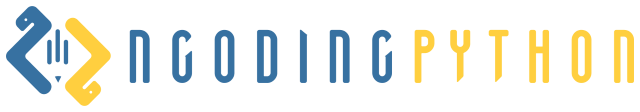

# Simpan dan Load Model

Dalam notebook ini, kita akan membahas bagaimana cara menyimpan dan memuat model yang telah kita latih menggunakan dataset Iris. Tujuannya adalah agar kita dapat melakukan deployment model di aplikasi lain tanpa harus melatih model tersebut lagi.

Kita akan menggunakan dua sumber data yang berbeda: numpy dan pandas.

## Persiapan

Pastikan library sudah terdownload

In [1]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import pandas
print('pandas:', pandas.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

IPython: 8.14.0
numpy: 1.25.2
pandas: 2.0.3
scikit-learn: 1.3.0


## Load Data

Load data iris dari library scikit-learn

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

Simpan data kedalam dua format yang berbeda, ini digunakan untuk model yang berbeda nanti

In [3]:
# data numpy
X, y = iris.data, iris.target

print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [4]:
# data pandas
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Buat Pipeline Model

Dalam kasus sederhana ini, kita akan membuat model machine learning dengan flow berikut:
Data -> Scaling -> Model

Sehingga dalam kasus ini, kita akan menggunakan pipeline untuk membungkus proses tersebut

In [5]:
# buat pipeline untuk data numpy
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

model_numpy = make_pipeline(StandardScaler(), LinearSVC(dual='auto'))

In [6]:
# lakukan hal yang sama untuk data pandas
model_pandas = make_pipeline(StandardScaler(), LinearSVC(dual='auto'))

## Training & Save Model

Lakukan training terhadap data yang udah dipersiapkan sebelumnya

In [7]:
# data numpy
# split data training-testing
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# train model
model_numpy.fit(X_train, y_train)

# evaluasi model
y_pred = model_numpy.predict(X_test)
print(classification_report(y_test, y_pred))

# simpan model
with open("model_numpy.pkl", "wb") as model_file:
    pickle.dump(model_numpy, model_file)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.78      0.82         9
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [8]:
# inference model data numpy
new_data = [1, 2, 3, 4]

model_numpy.predict([new_data])

array([2])

In [9]:
# data pandas
# split data training-testing

df_train, df_test = train_test_split(df, test_size=0.2, random_state=46)

# train model
model_pandas.fit(df_train.drop('target', axis=1), df_train['target'])

# evaluasi model
y_pred = model_pandas.predict(df_test.drop('target', axis=1))
print(classification_report(df_test['target'], y_pred))

# simpan model
with open("model_pandas.pkl", "wb") as model_file:
    pickle.dump(model_pandas, model_file)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.78      0.82         9
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [13]:
# inference model data pandas
new_data = [1, 2, 3, 4]
new_data = pd.DataFrame([new_data], columns=iris.feature_names)

model_pandas.predict(new_data)

array([2])

## Load Model
Untuk menggunakan model yang diload, kita harus perhatikan model tersebut di train dengan menggunakan tipe data apa, karena itu mempengaruhi bagaimana cara kita membaca modelnya

In [14]:
# load model
with open("model_pandas.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [16]:
# inference model
new_data = [1, 2, 3, 4]
new_data = pd.DataFrame([new_data], columns=iris.feature_names)

model.predict(new_data)

array([2])